In [4]:
import pandas as pd, matplotlib.pyplot as plt

## A Priori Analysis

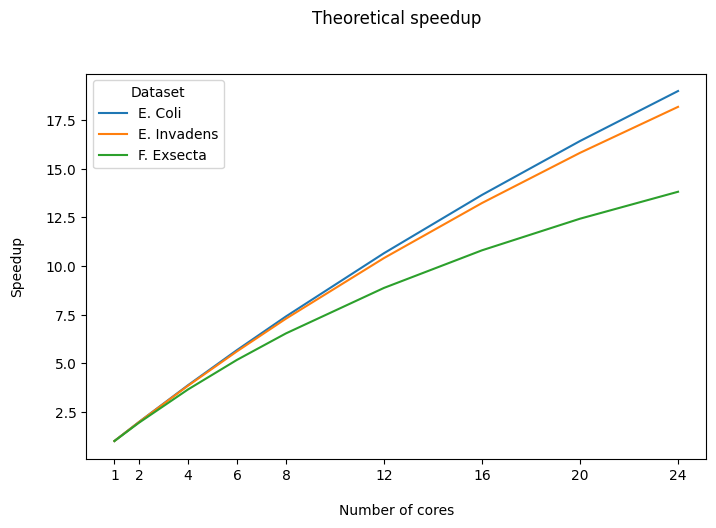

In [15]:
def estimate_speedups(S, P, Narray):
    speedups = []
    for N in Narray:
        speedup = 1 / (S + P/N)
        speedups.append(speedup)
    return speedups


Narray = [1,2,4,6,8,12,16,20,24]

speed1 = estimate_speedups(0.01145, 0.98855, Narray)
speed2 = estimate_speedups(0.01391, 0.98609, Narray)
speed3 = estimate_speedups(0.03204, 0.96796, Narray)

plt.figure(figsize=(8, 5))
plt.plot(Narray, speed1)
plt.plot(Narray, speed2)
plt.plot(Narray, speed3)
plt.title('Theoretical speedup\n\n')
plt.legend(title='Dataset', labels=['E. Coli ', 'E. Invadens', 'F. Exsecta'], loc='best')
plt.xticks(ticks=Narray)
plt.xlabel('\nNumber of cores')
plt.ylabel('Speedup\n')
plt.show()

## Fat cluster

### Intra-regional

In [26]:
df = pd.read_csv('../src/parallel/GCP/tests/fat-cluster/intra/results_fat_intra.csv', delimiter=';', decimal=",", engine='python')

df

,dataset_size,v_cpu,time_read_preprocessing,time_search,time_total,speedup,efficiency
0,4699745,1,0.221,29.934,30.155,1.00,1.00
1,4699745,4,0.221,7.331,7.552,3.99,1.00
2,4699745,8,0.284,3.915,4.199,7.18,0.90
3,4699745,12,0.280,2.586,2.866,10.52,0.88
4,4699745,16,0.285,1.995,2.280,13.23,0.83
5,4699745,20,0.316,1.568,1.883,16.01,0.80
6,4699745,24,0.282,1.338,1.620,18.61,0.78
7,41522539,1,1.942,181.256,183.198,1.00,1.00
8,41522539,4,1.936,46.065,48.001,3.82,0.96
9,41522539,8,2.437,24.897,27.334,6.70,0.84


#### Strong scalability

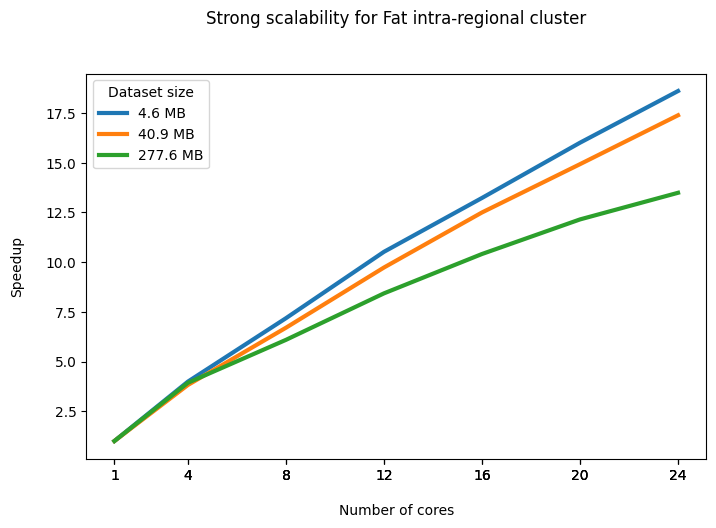

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in df.groupby(['dataset_size']):
    ax = grp.plot(ax=ax, kind='line', x='v_cpu', y='speedup', legend=True, linewidth=3)

plt.title('Strong scalability for Fat intra-regional cluster\n\n')
plt.legend(title='Dataset size', labels=['4.6 MB', '40.9 MB', '277.6 MB'], loc='best')
plt.xticks(ticks=df["v_cpu"])
plt.xlabel('\nNumber of cores')
plt.ylabel('Speedup\n')
plt.show()

#### Weak scalability

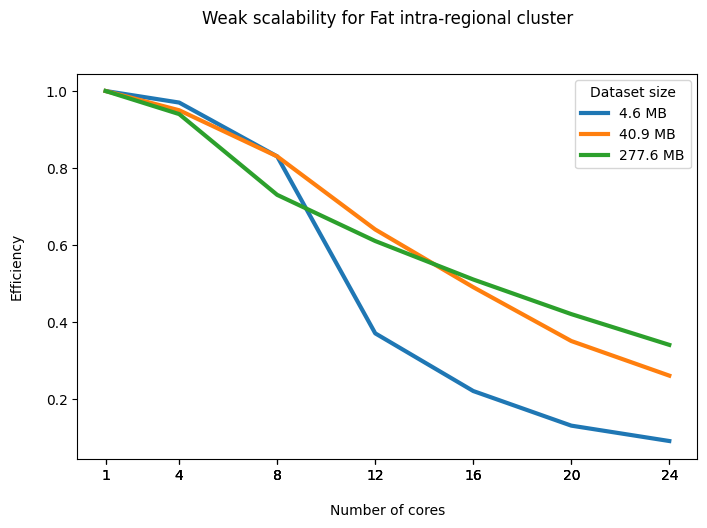

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in df.groupby(['dataset_size']):
    ax = grp.plot(ax=ax, kind='line', x='v_cpu', y='efficiency', legend=True, linewidth=3)

plt.title('Weak scalability for Fat intra-regional cluster\n\n')
plt.legend(title='Dataset size', labels=['4.6 MB', '40.9 MB', '277.6 MB'], loc='best')
plt.xticks(ticks=df["v_cpu"])
plt.xlabel('\nNumber of cores')
plt.ylabel('Efficiency\n')
plt.show()

### Infra-regional

In [36]:
df = pd.read_csv('../src/parallel/GCP/tests/fat-cluster/infra/results_fat_infra.csv', delimiter=';', decimal=",", engine='python')

df

,dataset_size,v_cpu,time_read_preprocessing,time_search,time_total,speedup,efficiency
0,4699745,1,0.222,30.413,30.636,1.00,1.00
1,4699745,4,0.233,7.641,7.874,3.89,0.97
2,4699745,8,0.305,4.321,4.626,6.62,0.83
3,4699745,12,0.293,6.603,6.896,4.44,0.37
4,4699745,16,0.300,8.237,8.537,3.59,0.22
5,4699745,20,0.292,11.541,11.833,2.59,0.13
6,4699745,24,0.308,13.869,14.177,2.16,0.09
7,41522539,1,1.952,183.610,185.563,1.00,1.00
8,41522539,4,1.959,46.787,48.746,3.81,0.95
9,41522539,8,2.459,25.666,28.125,6.60,0.83
